# Set up

In [1]:
import numpy as np
import tensorflow as tf
from pathlib import Path

2024-03-13 08:40:04.057192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# The tf.data API

In [2]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

2024-03-12 23:22:30.328674: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2024-03-12 23:22:30.364174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [10]
	 [[{{node Placeholder/_0}}]]


In [4]:
# Similar to the previous code cell
dataset = tf.data.Dataset.range(10)
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [5]:
X_nested = {"a": ([1, 2, 3], [4, 5, 6]), "b": [7, 8, 9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


2024-03-12 23:22:30.400891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int32 and shape [3]
	 [[{{node Placeholder/_2}}]]


## Chaining Transformations

In [6]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


2024-03-12 23:22:30.420250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [10]
	 [[{{node Placeholder/_0}}]]


In [7]:
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


2024-03-12 23:22:30.451165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [10]
	 [[{{node Placeholder/_0}}]]


In [8]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


2024-03-12 23:22:30.488102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [10]
	 [[{{node Placeholder/_0}}]]


In [9]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


2024-03-12 23:22:30.513422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [10]
	 [[{{node Placeholder/_0}}]]


## Shuffling the Data

In [10]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=4, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 4 2 3 5 0 6], shape=(7,), dtype=int64)
tf.Tensor([9 8 2 0 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([5 7 9 6 7 8], shape=(6,), dtype=int64)


In [11]:
dataset = tf.data.Dataset.range(10)
# Tweak reshuffle_each_iteration=True and rerun to see the effect
dataset = dataset.shuffle(buffer_size=10, seed=42, reshuffle_each_iteration=False)
dataset = dataset.repeat().batch(10)

for element in dataset.take(5):
    print(element)

tf.Tensor([2 0 7 8 9 3 6 4 1 5], shape=(10,), dtype=int64)
tf.Tensor([2 0 7 8 9 3 6 4 1 5], shape=(10,), dtype=int64)
tf.Tensor([2 0 7 8 9 3 6 4 1 5], shape=(10,), dtype=int64)
tf.Tensor([2 0 7 8 9 3 6 4 1 5], shape=(10,), dtype=int64)
tf.Tensor([2 0 7 8 9 3 6 4 1 5], shape=(10,), dtype=int64)


### Interleaving lines from multiple files

For a very large dataset that does not fit in memory, you will typically want to split it into many files first, then have TensorFlow read these files in parallel. To demonstrate this, here we split the housing dataset and saving into 20 CSV files.

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [13]:
def save_to_csv_file(data, name_prefix, header=None, n_parts=10):
    housing_dir = Path() / "datasets" / "housing"
    housing_dir.mkdir(parents=True, exist_ok=True)
    filename_format = "my_{}_{:02d}.csv"

    filepaths = []
    m = len(data)
    chunks = np.array_split(np.arange(m), n_parts)
    for file_idx, row_indices in enumerate(chunks):
        part_csv = housing_dir / filename_format.format(name_prefix, file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv, "w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [14]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_csv_file(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_csv_file(valid_data, "valid", header, n_parts=20)
test_filepaths = save_to_csv_file(test_data, "test", header, n_parts=10)

In [15]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



In [16]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

**Building an Input Pipeline**

In [17]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [18]:
# Extra code shows that the file paths are shuffled
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

2024-03-12 23:22:31.014991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]


In [19]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), cycle_length=n_readers
)

In [20]:
for line in dataset.take(5):
    print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)


2024-03-12 23:22:31.063797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:31.064180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]


## Preprocessing the Data

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_mean, X_std = scaler.mean_, scaler.scale_
n_inputs = 8

In [23]:
def parse_csv_line(line):
    default = [0.0] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=default)
    return tf.stack(fields[:-1]), tf.stack(fields[-1:])


def preprocess(line):
    X, y = parse_csv_line(line)
    return (X - X_mean) / X_std, y

In [24]:
preprocess(b"4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782")

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [25]:
try:
    preprocess(b"4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2")
except tf.errors.InvalidArgumentError as er:
    print(er)

{{function_node __wrapped__DecodeCSV_OUT_TYPE_9_device_/job:localhost/replica:0/task:0/device:CPU:0}} Expect 9 fields but have 8 in record 0 [Op:DecodeCSV]


## Putting Everything Together + Prefetching

In [26]:
def csv_reader_dataset(
    filepaths,
    n_readers=5,
    n_read_threads=None,
    n_parse_threads=5,
    shuffle_buffer_size=10_000,
    seed=42,
    batch_size=32,
):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,
        num_parallel_calls=n_read_threads,
    )
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(buffer_size=shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1)

In [27]:
example_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in example_set.take(2):
    print("X= ", X_batch)
    print("Y= ", y_batch)
    print()

2024-03-12 23:22:31.251614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:31.252005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]


X=  tf.Tensor(
[[-1.3957452  -0.04940685 -0.22830808  0.22648273  2.2593622   0.35200632
   0.9667386  -1.4121602 ]
 [ 2.7112627  -1.0778131   0.69413143 -0.14870553  0.51810503  0.3507294
  -0.82285154  0.80680597]
 [-0.13484643 -1.868895    0.01032507 -0.13787179 -0.12893449  0.03143518
   0.2687057   0.13212144]], shape=(3, 8), dtype=float32)
Y=  tf.Tensor(
[[1.819]
 [3.674]
 [0.954]], shape=(3, 1), dtype=float32)

X=  tf.Tensor(
[[ 0.09031774  0.9789995   0.1327582  -0.13753782 -0.23388447  0.10211545
   0.97610843 -1.4121602 ]
 [ 0.05218809 -2.0271113   0.2940109  -0.02403445  0.16218767 -0.02844518
   1.4117942  -0.93737936]
 [-0.672276    0.02970133 -0.76922584 -0.15086786  0.4962024  -0.02741998
  -0.7853724   0.77182245]], shape=(3, 8), dtype=float32)
Y=  tf.Tensor(
[[2.725]
 [1.205]
 [1.625]], shape=(3, 1), dtype=float32)



## Using the Dataset with Keras

In [28]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [29]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [30]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=X_train.shape[1:],
        ),
        tf.keras.layers.Dense(1),
    ]
)
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5


2024-03-12 23:22:31.530743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:31.530997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]


363/363 [==============================] - 1s 2ms/step - loss: 2.7431 - val_loss: 1.1762
Epoch 2/5


2024-03-12 23:22:32.226965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:32.227162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20]
	 [[{{node Placeholder/_0}}]]


363/363 [==============================] - 1s 1ms/step - loss: 0.9692 - val_loss: 686.8362
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 1.2471 - val_loss: 11.0428
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5985 - val_loss: 7.4387
Epoch 5/5
363/363 [==============================] - 0s 967us/step - loss: 0.5883 - val_loss: 12.4514


In [31]:
test_mse = model.evaluate(test_set)
test_mse
new_set = test_set.take(3)  # pretend we have 3 new samples
y_predict = model.predict(new_set)  # you can just pass a NumPy array instead

162/162 [==============================] - 0s 620us/step - loss: 0.4315


2024-03-12 23:22:34.530028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:34.530466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10]
	 [[{{node Placeholder/_0}}]]
2024-03-12 23:22:34.723674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10]
	 [[

3/3 [==============================] - 0s 6ms/step


In [32]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error

n_epochs = 5
for epoch in range(1, n_epochs + 1):
    for X_batch, y_batch in train_set:
        print("\rEpoch{}/{}".format(epoch, n_epochs), end="")
        with tf.GradientTape() as tape:
            y_predict = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_predict))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch5/5

In [33]:
@tf.function
def train_one_epoch(model, optimizer, loss_fn, train_set):
    with tf.GradientTape() as tape:
        y_predict = model(X_batch)
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_predict))
        loss = tf.add_n([main_loss] + model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
for epoch in range(n_epochs):
    print("\rEpoch{}/{}".format(epoch + 1, n_epochs), end="")
    train_one_epoch(model, optimizer, loss_fn, train_set)

Epoch1/5

Epoch5/5

# The TFRecord Format

In [34]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [35]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


2024-03-12 23:22:44.679971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [36]:
# Extra code shows how to read multiple files in parallel and interleave them

filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(5):
            f.write("File {} record {}".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 0 record 3', shape=(), dtype=string)
tf.Tensor(b'File 1 record 3', shape=(), dtype=string)
tf.Tensor(b'File 2 record 3', shape=(), dtype=string)
tf.Tensor(b'File 0 record 4', shape=(), dtype=string)
tf.Tensor(b'File 1 record 4', shape=(), dtype=string)
tf.Tensor(b'File 2 record 4', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1'

2024-03-12 23:22:44.701081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5]
	 [[{{node Placeholder/_0}}]]


## Compressed TFRecord Files

In [37]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compression.tfrecord", options=options) as f:
    f.write(b"Compress, compress, compress!")

In [38]:
dataset = tf.data.TFRecordDataset(["my_compression.tfrecord"], compression_type="GZIP")

In [39]:
for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


2024-03-12 23:22:44.736244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


## A Brief Introduction to Protocol Buffers

Here, we write a simple protobuf definition: 

In [40]:
%%writefile my_person.proto
syntax="proto3";
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Overwriting my_person.proto


Now we compile it (the `--descriptor_set_out` and `--include_imports` options are only required for the `tf.io.decode_proto()` example below).

In [41]:
!protoc my_person.proto --python_out=. --descriptor_set_out=my_person.desc --include_imports

In [42]:
%ls my_person*

my_person.desc  my_person_pb2.py  my_person.proto


In [43]:
from my_person_pb2 import Person

person = Person(name="Tom", id=123, email=["a@b.com"])  # create a person
print(person)

name: "Tom"
id: 123
email: "a@b.com"



In [44]:
person.name

'Tom'

In [45]:
person.name = "Alice"  # modify a field

In [46]:
person.email[0]  # repeated fields can be accessed like arrays

'a@b.com'

In [47]:
person.email.append("c@d.com")

In [48]:
serialized = person.SerializeToString()
serialized

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [49]:
person2 = Person()  # create a new Person
person2.ParseFromString(serialized)

27

In [50]:
person == person2

True

### Custom protobuf

In rare cases, you may want to parse a custom protobuf (like the one we just created) in TensorFlow. For this, you can use the `tf.io.decode_proto()` function.

In [51]:
# Extra code shows how to use the tf.io.decode_proto() function

person_tf = tf.io.decode_proto(
    bytes=serialized,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="my_person.desc",
)

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>]

For more details, check out the [`tf.io.decode_proto()`](https://www.tensorflow.org/api_docs/python/tf/io/decode_proto) documentation.

In [52]:
tf.io.decode_proto?

Signature:
tf.io.decode_proto(
    bytes,
    message_type,
    field_names,
    output_types,
    descriptor_source='local://',
    message_format='binary',
    sanitize=False,
    name=None,
)
Docstring:
The op extracts fields from a serialized protocol buffers message into tensors.

Note: This API is designed for orthogonality rather than human-friendliness. It
can be used to parse input protos by hand, but it is intended for use in
generated code.

The `decode_proto` op extracts fields from a serialized protocol buffers
message into tensors.  The fields in `field_names` are decoded and converted
to the corresponding `output_types` if possible.

A `message_type` name must be provided to give context for the field names.
The actual message descriptor can be looked up either in the linked-in
descriptor pool or a filename provided by the caller using the
`descriptor_source` attribute.

Each output tensor is a dense tensor. This means that it is padded to hold
the largest number of repe

## TensorFlow Protobufs

In [53]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"])),
        }
    )
)

In [54]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

## Loading and Parsing Examples

In [55]:
feature_descriptions = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}


def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_descriptions)


dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).map(parse)
for parsed_example in dataset:
    print(parsed_example)

{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tenso

2024-03-12 23:22:45.239577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [56]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [57]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [58]:
def parse(serialized_example):
    return tf.io.parse_example(serialized_example, feature_descriptions)


dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(2).map(parse)
for parsed_example in dataset:
    print(parsed_example)

{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Ten

2024-03-12 23:22:45.325838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [59]:
parsed_example

{'emails': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([1 2], shape=(2,), dtype=int64)),
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123])>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>}

## Extra Material - Storing Images and Tensors in TFRecords  

Here we load and display an example image:

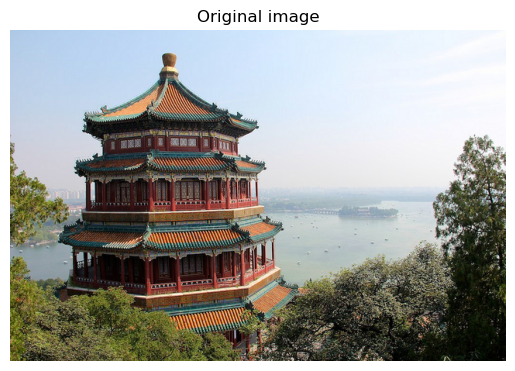

In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original image")
plt.show()

Now, we create an `Example` protobuf containing the image encoded as JPEG:

In [61]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(
    features=Features(
        feature={"image": Feature(bytes_list=BytesList(value=[data.numpy()]))}
    )
)
with tf.io.TFRecordWriter("my_image.tfrecord") as f:
    f.write(example_with_image.SerializeToString())

Finally, we create a tf.data pipeline that read this TFRecord file, parse each `Example` protobuf (just one in this case), and parse and display the image that the example contains.

2024-03-12 23:22:45.894832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


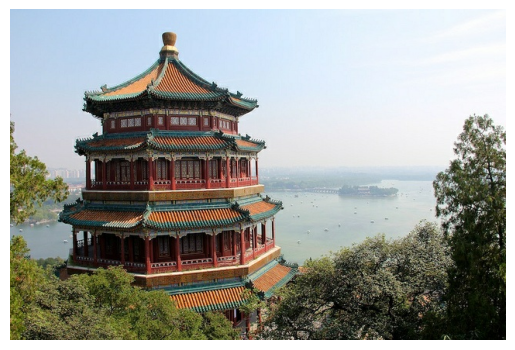

In [62]:
feature_description = {"image": tf.io.VarLenFeature(tf.string)}


def parse(serialized_example):
    example_with_image = tf.io.parse_single_example(
        serialized_example, feature_description
    )
    # you can use tf.io.decode_image() instead
    return tf.io.decode_jpeg(example_with_image["image"].values[0])


dataset = tf.data.TFRecordDataset("my_image.tfrecord").map(parse)
for image in dataset:
    plt.imshow(image)
    plt.axis("off")
    plt.show()

Tensors can be serialized and parsed by using `tf.io.serialize_tensor()` and `tf.io.parse_tensor()`.

In [63]:
tensor = tf.constant([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]])
serialized = tf.io.serialize_tensor(tensor)
serialized

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [64]:
tf.io.parse_tensor(serialized, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [65]:
sparse_tensor = parsed_example["emails"]
serialized_sparse = tf.io.serialize_sparse(sparse_tensor)
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x02" \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x02"\x10\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [66]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\002\" \000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"\020\007\007a@b.comc@d.com"
value: "\010\t\022\004\022\002\010\002\"\020\001\000\000\000\000\000\000\000\002\000\000\000\000\000\000\000"

## Handling Lists of Lists Using the `SequenceExample` protobuf

In [67]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

context = Features(
    feature={
        "author_id": Feature(int64_list=Int64List(value=[123])),
        "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
        "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25])),
    }
)
content = [
    ["When", "shall", "we", "three", "meet", "again", "?"],
    ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"],
]
comments = [
    ["When", "the", "hurly", "burly", "'s", "done", "."],
    ["When", "the", "battle", "'s", "lost", "and", "won", "."],
]

In [68]:
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8") for word in words]))


content_features = [words_to_feature(sentence) for sentence in content]
comment_feature = [words_to_feature(comment) for comment in comments]

sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(
        feature_list={
            "content": FeatureList(feature=content_features),
            "comment": FeatureList(feature=comment_feature),
        }
    ),
)

In [69]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comment"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurly"
          value: "burly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
   

In [70]:
serialized_sequence_example = sequence_example.SerializeToString()

In [71]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

In [72]:
parsed_context, parsed_feature_list = tf.io.parse_single_sequence_example(
    serialized_sequence_example,
    context_feature_descriptions,
    sequence_feature_descriptions,
)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_list["content"])

In [73]:
parsed_context

{'title': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]
  [2]
  [3]], shape=(4, 1), dtype=int64), values=tf.Tensor([b'A' b'desert' b'place' b'.'], shape=(4,), dtype=string), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)),
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>}

In [74]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [75]:
parsed_feature_list

{'comments': SparseTensor(indices=tf.Tensor([], shape=(0, 2), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=string), dense_shape=tf.Tensor([0 0], shape=(2,), dtype=int64)),
 'content': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]
  [0 2]
  [0 3]
  [0 4]
  [0 5]
  [0 6]
  [1 0]
  [1 1]
  [1 2]
  [1 3]
  [1 4]
  [1 5]
  [1 6]
  [1 7]
  [1 8]], shape=(16, 2), dtype=int64), values=tf.Tensor(
 [b'When' b'shall' b'we' b'three' b'meet' b'again' b'?' b'In' b'thunder'
  b',' b'lightning' b',' b'or' b'in' b'rain' b'?'], shape=(16,), dtype=string), dense_shape=tf.Tensor([2 9], shape=(2,), dtype=int64))}

In [76]:
print(tf.RaggedTensor.from_sparse(parsed_feature_list["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'],
 [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


# Keras Preprocessing Layers

## The `Normalization` Layer

In [77]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.Sequential([norm_layer, tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
norm_layer.adapt(X_train)
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 3.0821 - val_loss: 1.0540
Epoch 2/5
312/363 [========================>.....] - ETA: 0s - loss: 0.6997

363/363 [==============================] - 0s 1ms/step - loss: 0.6912 - val_loss: 1.6400
Epoch 3/5
363/363 [==============================] - 0s 861us/step - loss: 0.6028 - val_loss: 1.0552
Epoch 4/5
363/363 [==============================] - 0s 678us/step - loss: 0.5840 - val_loss: 0.7677
Epoch 5/5
363/363 [==============================] - 0s 831us/step - loss: 0.5766 - val_loss: 0.5483


In [78]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)

In [79]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
363/363 [==============================] - 0s 730us/step - loss: 2.1824 - val_loss: 0.8232
Epoch 2/5
363/363 [==============================] - 0s 688us/step - loss: 0.6406 - val_loss: 1.6613
Epoch 3/5
363/363 [==============================] - 0s 767us/step - loss: 0.5705 - val_loss: 1.0669
Epoch 4/5
363/363 [==============================] - 0s 676us/step - loss: 0.5574 - val_loss: 0.7393
Epoch 5/5
363/363 [==============================] - 0s 669us/step - loss: 0.5527 - val_loss: 0.5230


In [80]:
final_model = tf.keras.Sequential([norm_layer, model])
X_new = X_test[:3]  # pretend we have new instances (unscaled)
y_predict = final_model(X_new)  # preprocess data and make predictions

In [81]:
y_predict

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.8488246],
       [1.6925453],
       [2.600565 ]], dtype=float32)>

In [82]:
# Extra code - creating a dataset to demo applying the norm_layer using map()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(5)

In [83]:
dataset = dataset.map(lambda X, y: (norm_layer(X), y))

In [84]:
list(dataset.take(1))  # Extra code shows the first batch

2024-03-12 23:22:50.232432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype float and shape [1,8]
	 [[{{node Placeholder/_7}}]]


[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.19397898, -1.0778134 , -0.94338703,  0.01485134,  0.02073434,
          -0.5729169 ,  0.9292575 , -1.4221283 ],
         [ 0.7519828 , -1.8688954 ,  0.40547714, -0.23327859,  1.8614666 ,
           0.20516504, -0.91655123,  1.0966992 ],
         [-0.4146912 ,  0.02970134,  0.8180874 ,  1.0567816 , -0.08786613,
          -0.29983333,  1.3087244 , -1.6970019 ],
         [ 1.7188952 , -1.315138  ,  0.3266428 , -0.21955286, -0.337921  ,
          -0.11146676, -0.982138  ,  0.94177264],
         [-0.96207213, -1.2360299 , -0.05625897, -0.03124575,  1.709061  ,
          -0.3025704 , -0.8041154 ,  1.3265917 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

In [85]:
class MyNormalization(tf.keras.layers.Layer):
    def adapt(self, X):
        self.mean_ = np.mean(X, axis=0, keepdims=True)
        self.std_ = np.std(X, axis=0, keepdims=True)

    def call(self, inputs):
        eps = tf.keras.backend.epsilon()  # create a small smoothing term
        return (inputs - self.mean_) / (self.std_ + eps)

In [86]:
my_norm_layer = MyNormalization()
my_norm_layer.adapt(X_train)
X_train_scaled = my_norm_layer(X_train)

## The Discretization Layer

In [87]:
age = tf.constant([[10.0], [93.0], [57.0], [18.0], [37.0], [5.0]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18.0, 50.0])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]])>

In [88]:
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]])>

## The `CategoryEncoding` Layer

In [89]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [90]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

In [91]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="count")
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 2.],
       [1., 0., 1.]], dtype=float32)>

In [92]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3 + 3)
onehot_layer(two_age_categories + [0, 3])  # add 3 to the second feature

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [93]:
# Extra code shows another way to one-hot encode each feature separately
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="one_hot")
tf.keras.layers.concatenate(
    [onehot_layer(cat) for cat in tf.transpose(two_age_categories)]
)  # we need to transpose in order to let each feature in the same array

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [94]:
# Extra code shows another way to do this, using tf.one_hot() and Flatten
tf.keras.layers.Flatten()(tf.one_hot(two_age_categories, depth=3))

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

## The `StringLookup` Layer

In [95]:
cities = ["Auckland", "Paris", "Paris", "San Francisco"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[1],
       [3],
       [3],
       [0]])>

In [96]:
str_lookup_layer = tf.keras.layers.StringLookup(num_oov_indices=5)
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Foo"], ["Bar"], ["Baz"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [7],
       [4],
       [3],
       [4]])>

In [97]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode="one_hot")
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)>

In [98]:
# Extra code - an example using the IntegerLookup layer
ids = [123, 456, 789]
int_lookup_layer = tf.keras.layers.IntegerLookup()
int_lookup_layer.adapt(ids)
int_lookup_layer([[123], [456], [123], [111]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[3],
       [2],
       [3],
       [0]])>

## The `Hashing` Layer

In [2]:
hashing_layer = tf.keras.layers.Hashing(num_bins=10)
hashing_layer([["Paris"], ["Tokyo"], ["Auckland"], ["Montreal"]])

2024-03-13 00:32:14.472205: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[0],
       [1],
       [9],
       [1]])>

## Encoding Categorical Features Using Embeddings

In [2]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

2024-03-13 08:10:10.847333: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.01921553, -0.03899221],
       [ 0.03937853,  0.02911722],
       [ 0.01921553, -0.03899221]], dtype=float32)>

**Warning**: There's a bug in Keras 2.8.0 ([issue #77](https://github.com/keras-team/tf-keras/issues/77)), which prevents using a `StringLookup` layer as the first layer of a `Sequential` model. Fortunately, there's a workaround: just add an `InputLayer` as the first layer.

In [3]:
tf.random.set_seed(42)
ocean_proximity = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_proximity)
lookup_and_embed = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=[], dtype=tf.string),
        str_lookup_layer,
        tf.keras.layers.Embedding(
            input_dim=str_lookup_layer.vocabulary_size(), output_dim=2
        ),
    ]
)
lookup_and_embed(np.array([["<1H OCEAN"], ["ISLAND"], ["<1H OCEAN"]]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.03353891, -0.04010582],
       [ 0.04202707,  0.01427115],
       [ 0.03353891, -0.04010582]], dtype=float32)>

In [4]:
# We create fake random data, you can load the real dataset if desired
tf.random.set_seed(42)
np.random.seed(42)
X_train_num = np.random.rand(10_000, 8)
X_train_cat = np.random.choice(ocean_proximity, size=10_000)
y_train = np.random.rand(10_000, 1)

X_valid_num = np.random.rand(2_000, 8)
X_valid_cat = np.random.choice(ocean_proximity, size=2_000)
y_valid = np.random.rand(2_000, 1)

In [5]:
num_input = tf.keras.layers.Input(shape=[8], name="num")
cat_input = tf.keras.layers.Input(shape=[], name="cat", dtype=tf.string)
cat_embeddings = lookup_and_embed(cat_input)
encoded_inputs = tf.keras.layers.concatenate([num_input, cat_embeddings])
outputs = tf.keras.layers.Dense(1)(encoded_inputs)
model = tf.keras.models.Model(inputs=[num_input, cat_input], outputs=[outputs])
model.compile(loss="mse", optimizer="sgd")
history = model.fit(
    (X_train_num, X_train_cat),
    y_train,
    epochs=5,
    validation_data=((X_valid_num, X_valid_cat), y_valid),
)

Epoch 1/5


313/313 [==============================] - 3s 5ms/step - loss: 0.1862 - val_loss: 0.1381
Epoch 2/5
313/313 [==============================] - 1s 5ms/step - loss: 0.1181 - val_loss: 0.1042
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0963 - val_loss: 0.0916
Epoch 4/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0883 - val_loss: 0.0867
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - val_loss: 0.0847


In [6]:
# Extra code shows that the model can also be trained using a tf.data.Dataset
train_set = tf.data.Dataset.from_tensor_slices(
    ((X_train_num, X_train_cat), y_train)
).batch(32)
valid_set = tf.data.Dataset.from_tensor_slices(
    ((X_valid_num, X_valid_cat), y_valid)
).batch(32)
history = model.fit(train_set, epochs=5, validation_data=(valid_set))

Epoch 1/5


2024-03-13 08:10:20.140609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [10000,1]
	 [[{{node Placeholder/_2}}]]


313/313 [==============================] - 2s 4ms/step - loss: 0.0839 - val_loss: 0.0839
Epoch 2/5
  1/313 [..............................] - ETA: 0s - loss: 0.0795

2024-03-13 08:10:21.661988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [2000,1]
	 [[{{node Placeholder/_2}}]]


313/313 [==============================] - 1s 3ms/step - loss: 0.0834 - val_loss: 0.0835
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0831 - val_loss: 0.0833
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0830 - val_loss: 0.0831
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - val_loss: 0.0831


In [7]:
# Extra code shows that the dataset can contain dictionaries
train_set = tf.data.Dataset.from_tensor_slices(
    ({"num": X_train_num, "cat": X_train_cat}, y_train)
).batch(32)
valid_set = tf.data.Dataset.from_tensor_slices(
    ({"num": X_valid_num, "cat": X_valid_cat}, y_valid)
).batch(32)
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5


2024-03-13 08:10:26.100015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [10000,1]
	 [[{{node Placeholder/_2}}]]


301/313 [===========================>..] - ETA: 0s - loss: 0.0826

2024-03-13 08:10:27.402075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [2000,1]
	 [[{{node Placeholder/_2}}]]


313/313 [==============================] - 2s 4ms/step - loss: 0.0829 - val_loss: 0.0830
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0828 - val_loss: 0.0830
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - val_loss: 0.0829
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0828 - val_loss: 0.0829
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0828 - val_loss: 0.0829


## Text Preprocessing

In [8]:
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization()
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]])>

In [9]:
text_vec_layer = tf.keras.layers.TextVectorization(ragged=True)
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.RaggedTensor [[2, 1], [6, 2, 1, 2]]>

In [10]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="tf_idf")
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

In [11]:
2 * np.log(1 + 4 / (1 + 3))

1.3862943611198906

In [12]:
1 * np.log(1 + 4 / (1 + 1))

1.0986122886681098